# FAI hw 03

최재필

In [38]:
import numpy as np

## Q1. 

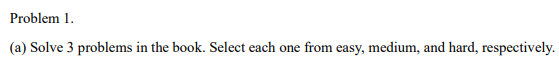

### 9.1

![image.png](attachment:image.png)

In [39]:
# Assuming order is not important

def get_intersection(A, B):
    return list(set(A) & set(B))

In [40]:
A = [1, 2, 3, 4, 5]
B = [0, 1, 3, 7]

get_intersection(A, B)

[1, 3]

time complexity: O(min(n, m))

In [41]:
# without using set & order matters

def get_intersection(A, B):
    return [x for x in A if x in B]

In [42]:
A = [1, 2, 3, 4, 5]
B = [0, 1, 3, 7]

get_intersection(A, B)

[1, 3]

time complexity: O(n * m)

### 9.7

![image.png](attachment:image.png)

1st try: 

- 한 번에 3개씩 iterative

In [43]:
test1 = [3, 5, 2, 4, 1]

In [44]:
def get_peaks(li):
    peaks = []
    for one, two, three in zip(li, li[1:], li[2:]):
        if one < two > three:
            peaks.append(two)
    
    return peaks

In [45]:
get_peaks(test1)

[5, 4]

## Q2.

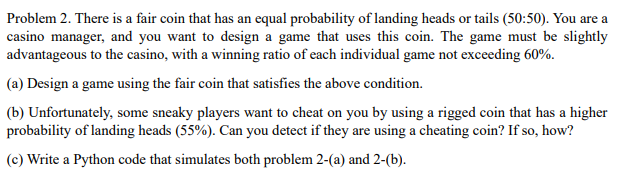

아이디어들 

- Penny's game
- 몬티홀 문제
- 바카라 룰
- binominal option pricing
- St.Petersburg paradox
- ....

설계
- 소액에선 risk taking (복권)
- 기대값이 아니라 win ratio 자체가 60%가 나와야 함. (슬롯머신 x)

조건
- win ratio <= 60%
- 모든 individual 게임이 같은 확률값을 가져야

### a. 

Penny's game 구현

https://en.wikipedia.org/wiki/Penney%27s_game

- 룰:
    - 플레이어-뱅커 순으로 동전 3개의 순열을 정한 뒤, 동전을 계속 던져 먼저 고른 순열이 나오는 쪽이 이긴다. 

- 승리 전략:
    - 플레이어가 고른 순열을 [c1, c2, c3] 이라고 한다면, 
    - 뱅커는 [c2의반대, c1, c2]를 제시한다.  

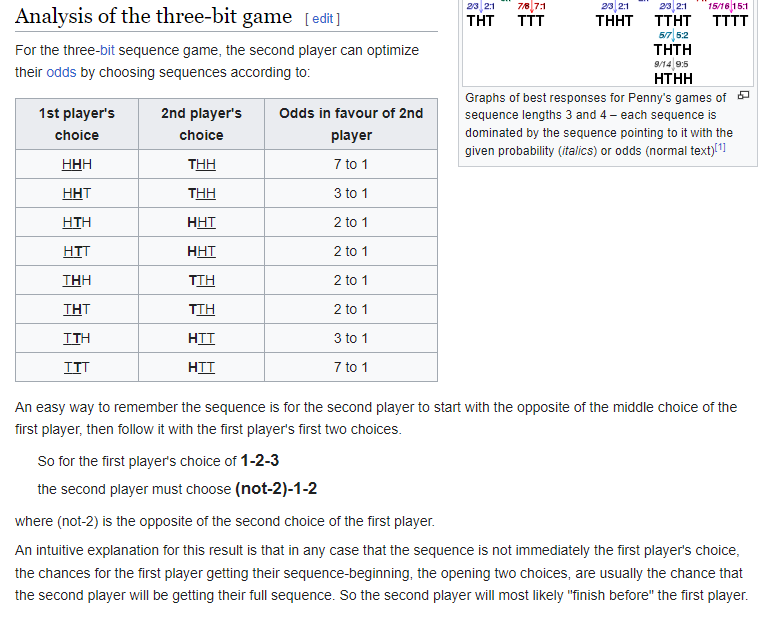

In [94]:
import numpy as np
import random
from collections import Counter
from tqdm import tqdm

import seaborn as sns

from scipy.stats import binomtest

In [80]:

def coin_seq(n, p=0.5):
    choices = ['H', 'T']

    return random.choices(choices, k=n, weights=[p, 1-p])

In [48]:
def get_banker_seq(player_seq):
    reverse = {
        'H': 'T', 
        'T': 'H',
        }
    return [reverse[player_seq[-2]]] + player_seq[:-1]

In [101]:
def generate_player_seq(n=3):
    choices = ['H', 'T']

    return random.choices(choices, k=n)

In [50]:
# def get_winner(player_seq, banker_seq, coin_seq):
#     for seq in zip(coin_seq, coin_seq[1:], coin_seq[2:]):
#         if seq == player_seq:
#             return 'player'
#         elif seq == banker_seq:
#             return 'banker'

In [51]:
def get_winner2(player_seq, banker_seq):
    assert len(player_seq) == len(banker_seq)
    length = len(player_seq)
    
    choices = ['H', 'T']
    
    c1 = random.choice(choices)
    c2 = random.choice(choices)
    c3 = random.choice(choices)

    while 1:
        if [c1, c2, c3] == player_seq:
            return 'player'
        elif [c1, c2, c3] == banker_seq:
            return 'banker'
        else:
            c1 = c2
            c2 = c3
            c3 = random.choice(choices)

#### simulate

Player가 랜덤하게 골랐을 경우

In [52]:
player_n = 1000000

player_seqs = [generate_player_seq() for _ in range(player_n)]
banker_seqs = [get_banker_seq(player_seq) for player_seq in player_seqs]

results_seq = [get_winner2(player_seq, banker_seq) for player_seq, banker_seq in zip(player_seqs, banker_seqs)]

In [53]:
Counter(results_seq)

Counter({'banker': 739211, 'player': 260789})

Player가 최선의 수만 골랐을 경우

In [54]:
def generate_opt_player_seq():
    return ['H', 'T', 'H']

In [55]:
player_n = 1000000

player_seqs = [generate_opt_player_seq() for _ in range(player_n)]
banker_seqs = [get_banker_seq(player_seq) for player_seq in player_seqs]

results_seq = [get_winner2(player_seq, banker_seq) for player_seq, banker_seq in zip(player_seqs, banker_seqs)]

In [56]:
Counter(results_seq)

Counter({'banker': 667104, 'player': 332896})

3개 이상일 경우 banker 대 player의 이길 확률

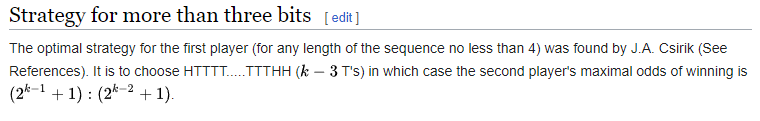

In [57]:
def opt(k):
    banker_odd, player_odd = 2**(k-1)+1, 2**(k-2)+1
    return banker_odd, player_odd, player_odd/banker_odd

### b. 

p = 55% 의 rigged coin을 사용하는 경우


In [58]:
def get_winner_rigged(player_seq, banker_seq):
    choices = ['H', 'T']
    
    c1 = np.random.choice(choices, p=[0.55, 0.45])
    c2 = np.random.choice(choices, p=[0.55, 0.45])
    c3 = np.random.choice(choices, p=[0.55, 0.45])

    while 1:
        if [c1, c2, c3] == player_seq:
            return 'player'
        elif [c1, c2, c3] == banker_seq:
            return 'banker'
        else:
            c1 = c2
            c2 = c3
            c3 = np.random.choice(choices, p=[0.55, 0.45])

In [79]:
player_n = 100000

rigged_player_seq = ['H', 'T', 'H']

player_seqs = [rigged_player_seq] * player_n

banker_seqs = [get_banker_seq(player_seq) for player_seq in player_seqs] # THH

results_seq = [get_winner_rigged(player_seq, banker_seq) for player_seq, banker_seq in zip(player_seqs, banker_seqs)]

In [78]:
Counter(results_seq)

Counter({'banker': 59693, 'player': 40307})

rigged coin을 알아내는 방법



#### simulate

In [87]:
n = 1000

seq = coin_seq(n, p=0.55)

Counter(seq)

Counter({'T': 461, 'H': 539})

In [97]:
test = binomtest(461, 1000, p=0.5)
p = test.pvalue

In [98]:
p

0.014852493227168898

In [99]:
p < 0.05

True